<a href="https://colab.research.google.com/github/AurelieGIRAUD/Customer_Segmentation_Project8/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 8 - Customer Segmentation based on credit card data
# 1/ Exploratory Data Analysis

## Get started

In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns

%matplotlib inline

In [24]:
Path.cwd()

PosixPath('/content')

In [25]:
df = pd.read_csv(Path.cwd()/'dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Following is the Data Dictionary for the dataset :

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Number of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

## Data Description

Let's start by having a look on the structure of the dataset and the global quality.

### Format

In [26]:
df.shape

(8950, 18)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<b> We have 18 variables and 8950 distinct card holders. </b>

### Basic Statistics

In [28]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<b> No odd values detected at this step. We can see that the ranges of values for the payment and balance are very broad. </b>

Observations: 

- BALANCE : No negative values. The mean is about 1564 whereas the median is about 873, so we can already suspect this variable for having a distribution skewed to the right (high values).

- BALANCEFREQUENCY : The balance is mostly frequently updated.
    - <b> Should we remove the rows where the balance is not frequently updated to avoid having odd values? </b>
    
    
- PURCHASES : The mean is about 592 whereas the median is about 38, so we can already suspect this variable for having a distribution skewed to the right (high values). We can see a max value at 40761, that looks odd.    
- ONEOFFPURCHASES : Same comments than before.  
- INSTALLMENTSPURCHASES : Same comments than before.  
- CASHADVANCE : Same comments than before.
    -  <b> Investigate the extreme values. </b>
    
    
- PURCHASESFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.5.
- ONEOFFPURCHASESFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.08.
- PURCHASESINSTALLMENTSFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.16.
- CASHADVANCEFREQUENCY : The range of values is very broad for this variable, from 0 to 1 with a mean of 0.22.


- CASHADVANCETRX : We have some extreme values at 123, where the Q3 equals to 4.   
- PURCHASESTRX : We have some extreme values at 358, where the Q3 equals to 17.
    - <b> Investigate the extreme values. </b>
    
    
- CREDITLIMIT : The range of values is very broad for this variable, but looks ok as we know that depending on the card you can have various limits.


- PAYMENTS : We have some extreme values at 50721, where the Q3 equals to 1901.  
- MINIMUM_PAYMENTS : We have some extreme values at 76406, where the Q3 equals to 825.
    - <b> Investigate the extreme values. </b>
    
    
- PRCFULLPAYMENT : Most of users are not paying fully. Nothing looks odd.


- TENURE : Most of user have a value at 12. Few users have a value at 6. 
    - <b> Investigate the minimum value. </b>

### Distribution

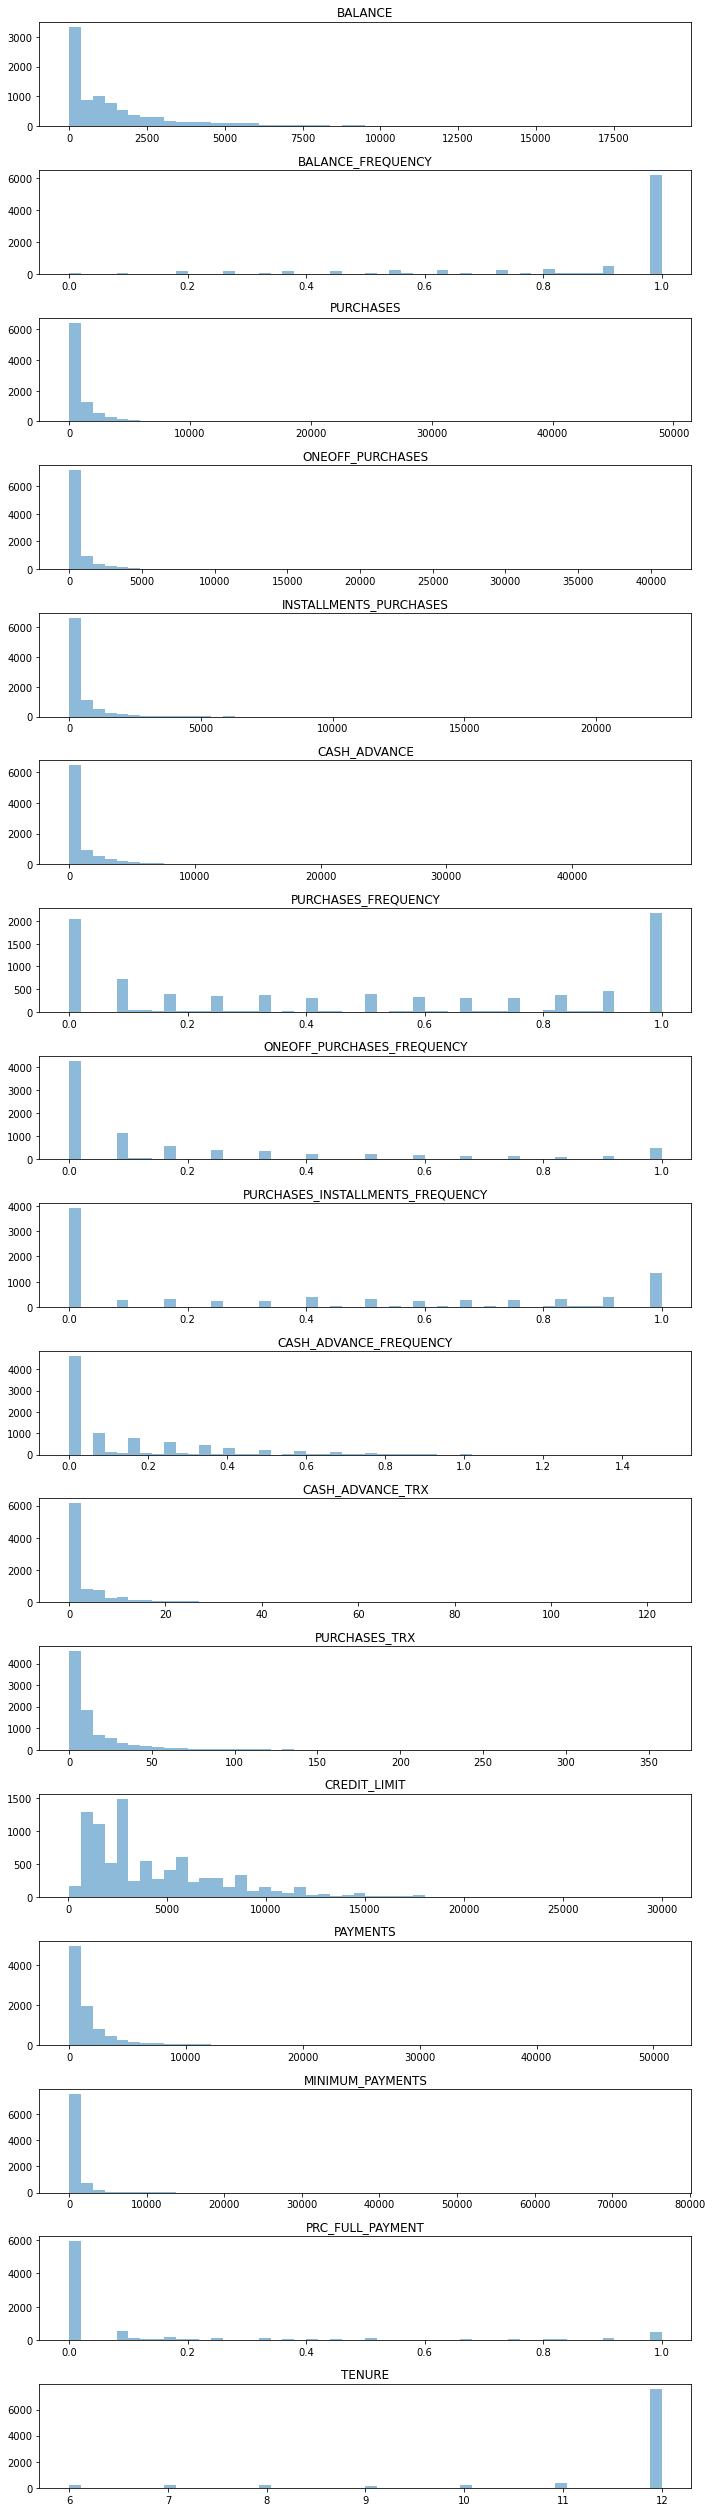

In [29]:
# Basic Dataset
tmp = df.iloc[:,1:] # we remove the ID column for the distribution plot
n = len(df.columns)-1

# Check the Distribution for each columns
plt.figure(figsize=(10,35))
for i in range(n):
    plt.subplot(17,1,i+1)
    plt.hist(tmp[tmp.columns[i]],bins=50, alpha=0.5)
    plt.title(tmp.columns[i])
plt.tight_layout()

<b> Observations: </b>

- BALANCE : As expected, this variable has a distribution skewed to the right (high values) meaning that most of customers have a balance close to the lower values but few of them have a very large amount of money on their accounts. 
- BALANCEFREQUENCY : The balance is frequently updated for most of customers.
    
- PURCHASES, ONEOFFPURCHASES, INSTALLMENTSPURCHASES, CASHADVANCE : As expected, these variable have a distribution skewed to the right (high values). Meaning that the majority of customers are not spending a lot whereas a few of customers are spending a large amount of money.
    
- PURCHASESFREQUENCY, ONEOFFPURCHASESFREQUENCY,PURCHASESINSTALLMENTSFREQUENCY: The distribution for these variables looks like a smiling curve, with 3 'groups': one with a low frequency of purchase, one with a high frequency of purchase and the rest of the customers.

- CASHADVANCEFREQUENCY, CASHADVANCETRX : These variables have a distribution skewed to the right (high values) meaning that most of customers are not using frequently the advance in cash but few of them are using it more frequently.
  
- PURCHASESTRX : This variable has a distribution skewed to the right (high values).
- CREDITLIMIT : This variable has a distribution skewed to the right (high values) meaning that most of customers have a low credit limit whereas some of them have a very high limit.

- PAYMENTS, MINIMUM_PAYMENTS : We see again the same pattern, these variable have a distribution skewed to the right (high values) meaning that most of customers are making low values payments whereas a few of them are making ver large payments.   
    
- PRCFULLPAYMENT : Most of users are not paying fully. We can expect 3 groups of customers on this variable, low % of full payment, high and the rest.

- TENURE : Most of user have a value at 12.

### Outliers

Let's visualize the extreme values on a box-plot.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


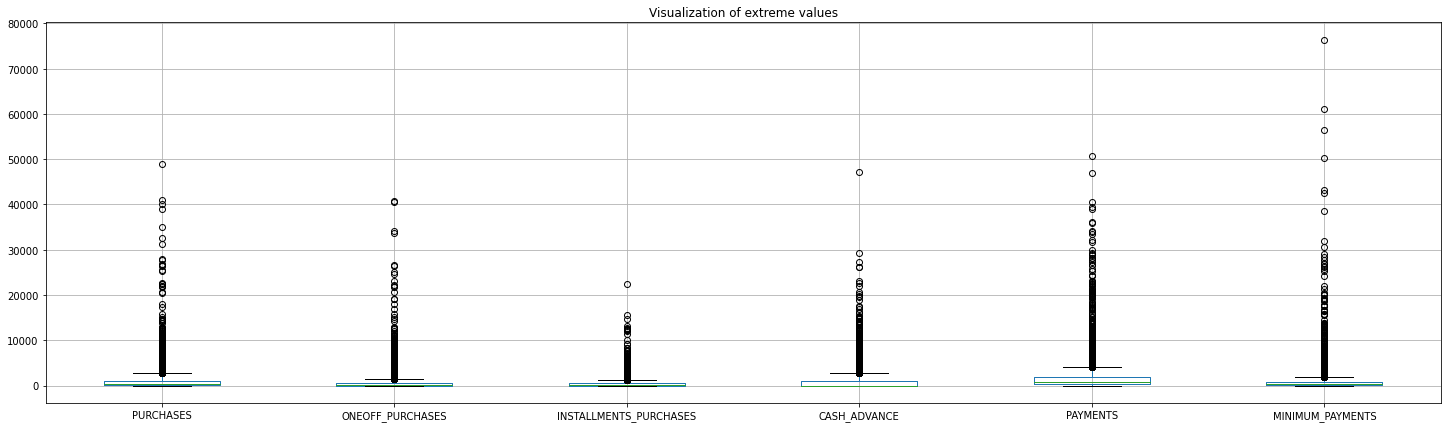

In [30]:
tmp = df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
                     'PAYMENTS','MINIMUM_PAYMENTS']]

plt.figure(figsize=(25,7))
df.boxplot(column = tmp.columns.to_list())
plt.title('Visualization of extreme values')
plt.show()

<b> Having outliers on payment data make sense so we should keep them. </b> However, even among the extreme values we can see some extreme values, very distant from the rest of the data. Perhaps, these values could be removed from the dataset before the clustering. 

<b> In general, the outliers can interfere with the clustering depending on which algorithm we pick. </b> For example, Kmeans is sensitive to outliers because a mean is easily influenced by extreme values. So we will have to be careful in the choice of the classification algorithm.

### Missing Values

In [31]:
# Check for each features
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
tmp = df[df['MINIMUM_PAYMENTS'].isna() == True].drop(['MINIMUM_PAYMENTS','CUST_ID','TENURE'],axis=1)
tmp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.0
45,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,0.0
47,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,0.0
54,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,0.0
55,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,0.0


In [33]:
len(df[(df['MINIMUM_PAYMENTS'].isna() == True) & (df['PAYMENTS'] == 0) & (df['PRC_FULL_PAYMENT'] == 0)])

240

In [34]:
len(df[(df['MINIMUM_PAYMENTS'].isna() != 0) & (df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna() == False)])

0

<b> On 313 rows with missing values on MINIMUM PAYMENTS, 240 (so 77%) have a null value on PAYMENT. if PAYMENT equals zero, MINIMUM PAYMENT should also equal zero. So we could implement the missing values by zero. </b> For the rest of the missing values, we will use the median as the distribution for this variable is clearly skewed (cf. below).

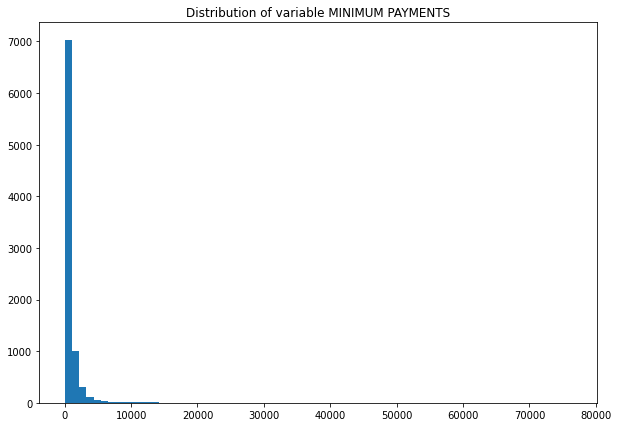

In [35]:
# Check the distribution for the Minimum Payments column
plt.figure(figsize=(10,7))
plt.hist(df['MINIMUM_PAYMENTS'],bins= 70)
plt.title('Distribution of variable MINIMUM PAYMENTS')
plt.show()

In [36]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [37]:
df['MINIMUM_PAYMENTS'].median()

312.343947

In [38]:
# Implement the missing values
df['MINIMUM_PAYMENTS'] = np.where((df['MINIMUM_PAYMENTS'].isna() == True) & (df['PAYMENTS'] == 0),0,df['MINIMUM_PAYMENTS'].median())

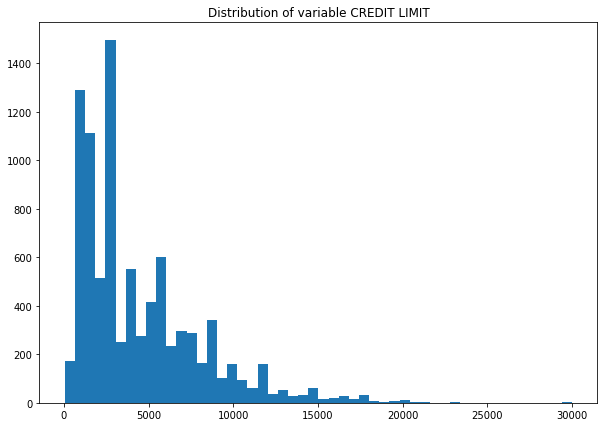

In [39]:
# Check the distribution for the CREDIT LIMIT column
plt.figure(figsize=(10,7))
plt.hist(df['CREDIT_LIMIT'],bins= 50)
plt.title('Distribution of variable CREDIT LIMIT')
plt.show()

In [40]:
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [41]:
df['CREDIT_LIMIT'].median()

3000.0

<b> The column is clearly skewed to the right, due to very high CREDIT LIMIT. </b> We can see the impact of the skewness on the mean: the mean is much higher than the median. Considering that, and because there is only 1 value missing, we replace it by the median of the column.

In [42]:
# Replace NaN values for CREDIT LIMIT
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

## Bivariate Analysis

### Pairplot

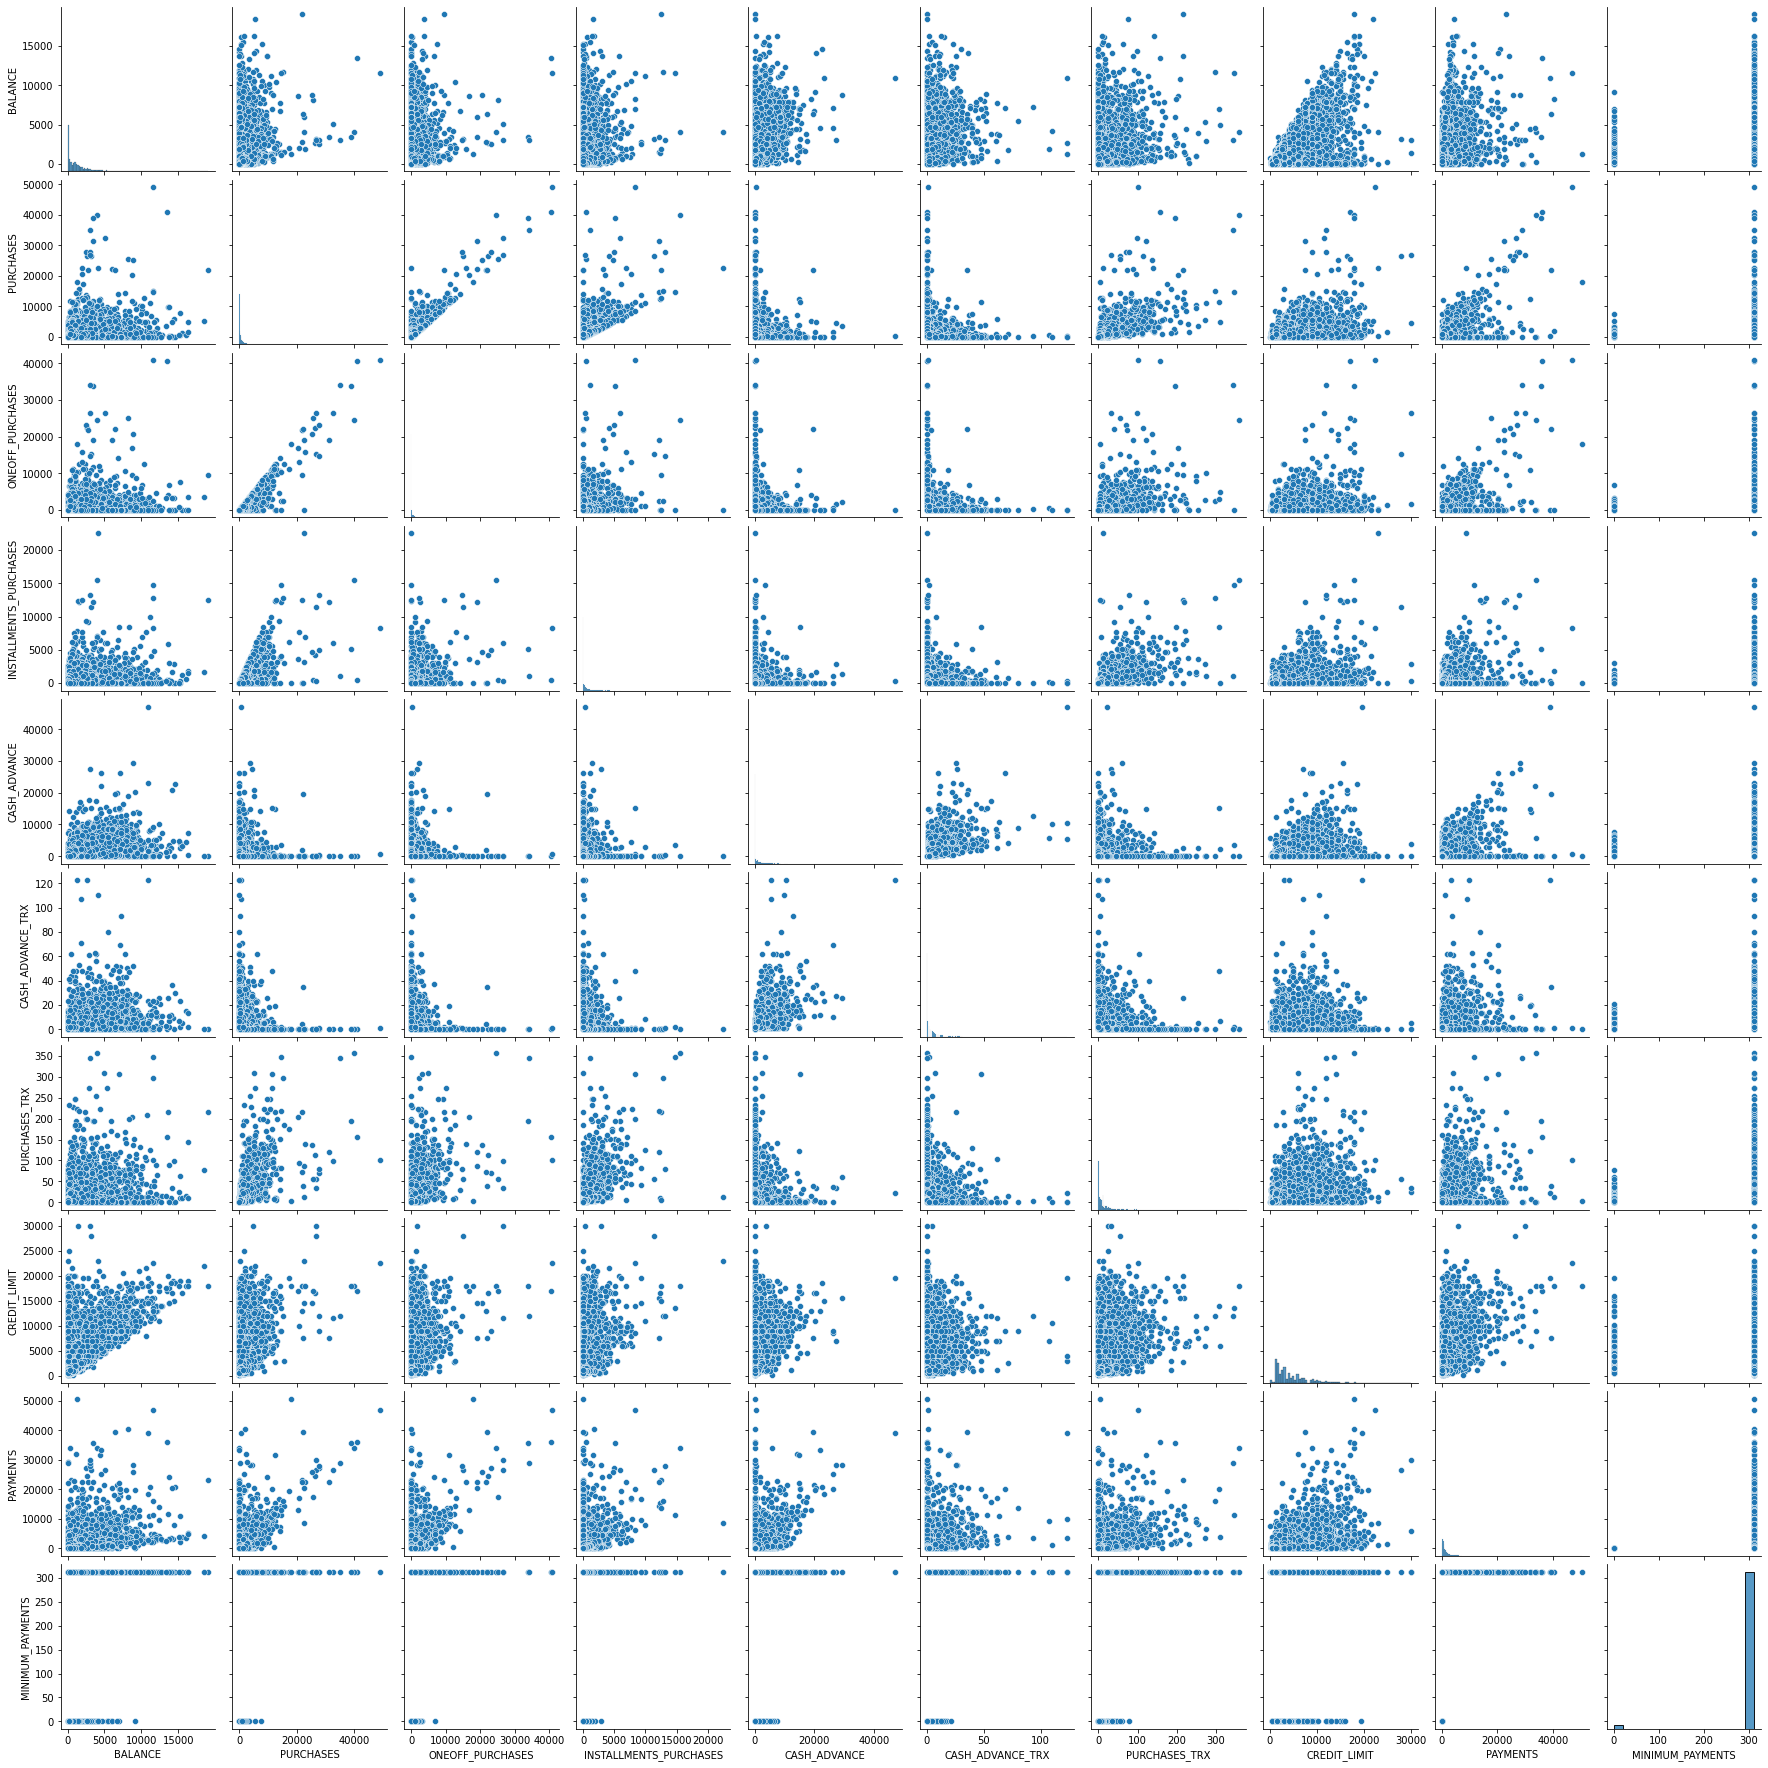

In [43]:
tmp = df.set_index(['CUST_ID','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','TENURE','PRC_FULL_PAYMENT']) #We exclude these columns from the pairplot
sns.pairplot(tmp)

<b> It looks like there is a linear relation between PURCHASES and ONEOFF_PURCHASES </b>

### Correlations

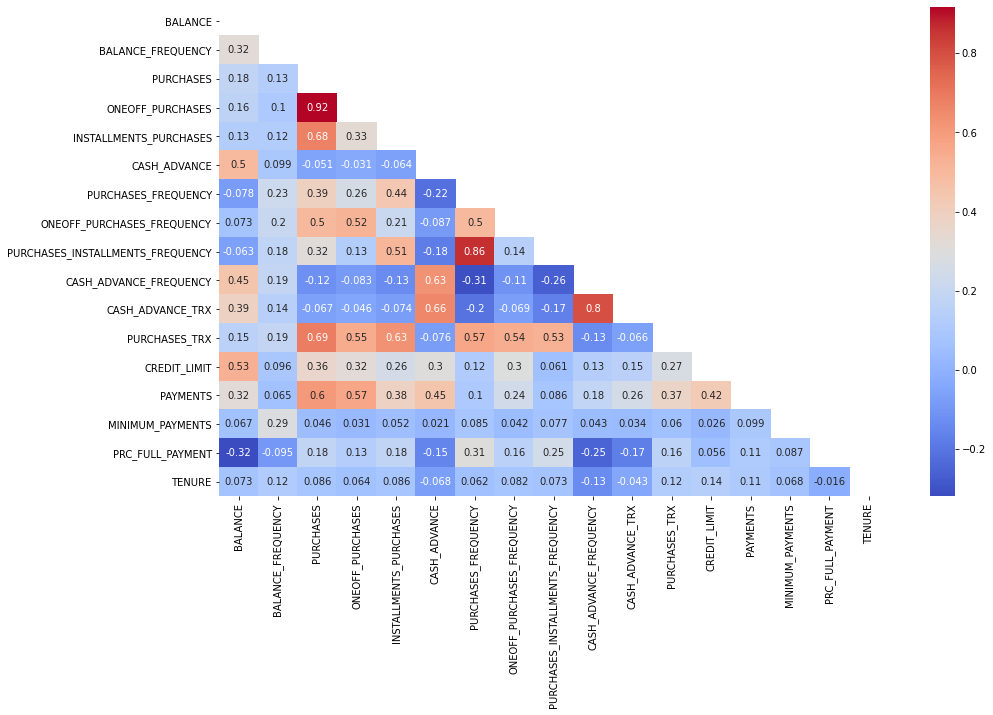

In [44]:
# Heatmap of correlation matrix
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) # Generate a mask for the upper triangle
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),mask=mask, annot = True,cmap= 'coolwarm')
plt.show()

<b> Observations</b>

The following variables are highly correlated together:
- ONEOFF_PURCHASES | PURCHASES 
    - This is expected as PURCHASES incl. ONEOFF_PURCHASES.
    
- PURCHASES_INSTALLMENTS_FREQUENCY | PURCHASES_FREQUENCY
    - This is expected as PURCHASES_FREQUENCY incl. PURCHASES_INSTALLMENTS_FREQUENCY.
    
- CASH_ADVANCE_TRX | CASH_ADVANCE_FREQUENCY
    - This is expected as the more customers are using cash advance for their payment the more the frequency will increase.

- There is a medium correlation between PURCHASES_TRX and PURCHASES, INSTALLMENTS_PURCHASES
    - Again, we can expect a correlation between these variables for the same reasons than above.

<b> We decide to remove the variables: CASH_ADVANCE_TRX, PURCHASE_FREQUENCY and ONEOFF_PURCHASES to avoid redundancy. </b> 

In [45]:
df.drop(['CASH_ADVANCE_TRX', 'PURCHASES_FREQUENCY','PURCHASES'],axis= 1, inplace=True)

In [46]:
# Export the output for the next step
df.to_csv(Path.cwd()/'dataset_cleaned.csv')